Lo primero que debemos hacer es importar torch y algunos módulos de esta librería:

* **torch.nn**: La librería de redes neuronales que utilizaremos para crear nuestro modelo.
* **torch.autograd**: En concreto el módulo Variable de esta librería que se encarga de manejar las operaciones de los tensores.
* **torchvision.datasets**: El módulo que ayudará a cargar el conjunto de datos que vamos a utilizar y explicaremos más adelante.
* **torchvision.transforms**: Este módulo contiene una serie de funciones que nos ayudarán modificando el dataset.
* **torch.optim**: De aquí usaremos el optimizador para entrenar la red neuronal y modificar sus pesos.

Para ello ejecutamos el siguiente código:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.optim as optim

Dataset a utilizar
Una vez importados los módulos, debemos cargar el conjunto de datos que vamos a utilizar, en este tutorial vamos a utilizar el conjunto conocido como MNIST. Se trata de un conjunto de imágenes de dígitos escritos a mano, contiene un total de 60000 imágenes para entrenamiento y 10000 para test. Todos los dígitos están normalizados en tamaño y centrados en la imagen de tamaño 28x28 en escala de grises. El objetivo de esta base de datos es clasificar cada imagen diciendo a que número entre el 0 y el 9 pertenece.

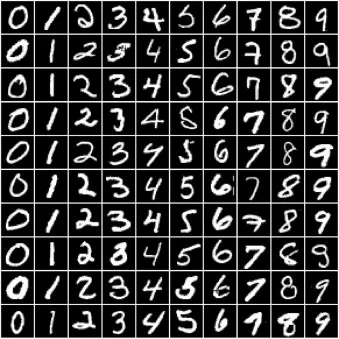


Para cargar de forma rápida el dataset vamos a utilizar el modulo datasets de torchvision, además debemos definir que transformaciones vamos a aplicarle a todas las muestras. En nuestro caso únicamente vamos a pasar el objeto obtenido a Tensor con lo que PyTorch podrá realizar cálculos, torchvision.transforms contiene una gran cantidad de transformaciones para aplicar a los datasets. Es recomendable normalizar nuestro dataset, este dataset viene por defecto normalizado valores entre 0 y 1. También vamos a fijar la semilla del generador aleatorio para poder replicar los experimentos.

In [ ]:
torch.manual_seed(123) #fijamos la semilla
trans = transforms.Compose([transforms.ToTensor()]) #Transformador para el dataset

Después definimos donde vamos a descargar los datos, en nuestro caso en la carpeta data dentro de la que estamos utilizando. La herramienta datasets de torchvision es muy fácil y cómoda para usar, simplemente debemos elegir el dataset entre los que tiene disponibles, debemos indicar la ruta a la carpeta con el parámetro root, si queremos el dataset de entrenamiento (en caso contrario obtendremos el de test), las transformaciones que se le van a aplicar que hemos definido anteriormente y si queremos descargar el dataset en el caso de que no lo tengamos almacenado ya. Para ello utilizaremos el siguiente código:

In [ ]:
root="./data"
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans)